
# RNN Dead Layer Fit Project

## Fit FCCD and DLF, MC 2 DLF not fixed


## Import general packages

In [1]:
#check env
import os
print (os.environ['CONDA_DEFAULT_ENV'])

/unix/legend/abi/ML_DL/MLenv


In [2]:
#General
import sys
import json
import yaml
import pandas as pd

#RNN imports
import numpy as np
import os
import argparse
import time
import math
import random
import torch.nn as nn
import torch.optim as optim
from torch.nn.parameter import Parameter
from torch.nn import init
import torch.nn.functional as F
import torch
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import gzip
import pickle
import numpy as np
from torch.autograd import Variable
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import torchsnooper #problem installing: !pip install torchsnooper --user #this worked for installing torchsnooper
import h5py
import re
from tqdm import tqdm
from torch.cuda.amp import autocast

torch.cuda.empty_cache()


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cuda:0")
print(DEVICE)
torch.cuda.is_available()

/unix/legend/abi/ML_DL/MLenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


True

## Import dataset and RNN functions

In [3]:
from src.data import *
from src.RNN import *
from src.training import *

## Get relevant paths

In [4]:
# Data paths:
CodePath = os.path.dirname(os.path.abspath("__file__"))
DATA_PATH = CodePath+"/data/V05268A_data/data_hist_Ba_V05268A.h5"
MC_PATH = CodePath+"/data/V05268A_data/training_data_V05268A/"


print(MC_PATH)

/unix/legend/abi/ML_DL/RNN_DeadLayerFit/data/V05268A_data/training_data_V05268A/


# -------------------------------------------------------
# WORKFLOW
# -------------------------------------------------------

# TRAINING 1a: full dataset, normal attention

In [5]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
RNN_ID = "RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_fulldataset_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Training  (DO NOT RERUN UNLESS NECESSARY)

In [ ]:
# #load dataset
# BATCH_SIZE = 4 
# train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

# #run training
# FCCD_accuracy_values, DLF_accuracy_values, loss_values = train_RNN(dataset, train_loader, test_loader, NUM_EPOCHS, LEARNING_RATE, saveRNN=True, plot_training_results = True, RNN_ID = RNN_ID)


In [ ]:
# #Training Results
# training_results(NUM_EPOCHS, loss_values, FCCD_accuracy_values, DLF_accuracy_values, save_plots = False, RNN_ID = RNN_ID)


## Testing

In [6]:
#load dataset again
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.37it/s]


(1000, 900)


In [7]:
# Load saved model
RNNclassifier_fulldataset = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_fulldataset.load_state_dict(torch.load(model_path))
RNNclassifier_fulldataset.eval()

RNN(
  (RNNLayer): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fcnet): FCNet(
    (fcnet): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
  )
  (attention_weight): Linear(in_features=512, out_features=512, bias=False)
)

Quantile regression loss function on DLF?:  False
FCCDonly?:  False
Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|████████████████████████████████████████████████████████████████████████████| 750/750 [01:05<00:00, 11.36it/s]


FCCD accuracies: 
total:  3000
TP:  1476
FP:  17
TN:  1497
FN:  10
accuracy:  0.991
precision:  0.9886135298057602
recall:  0.9932705248990579

DLF accuracies: 
total:  3000
TP:  1447
FP:  54
TN:  1444
FN:  55
accuracy:  0.9636666666666667
precision:  0.9640239840106596
recall:  0.9633821571238349


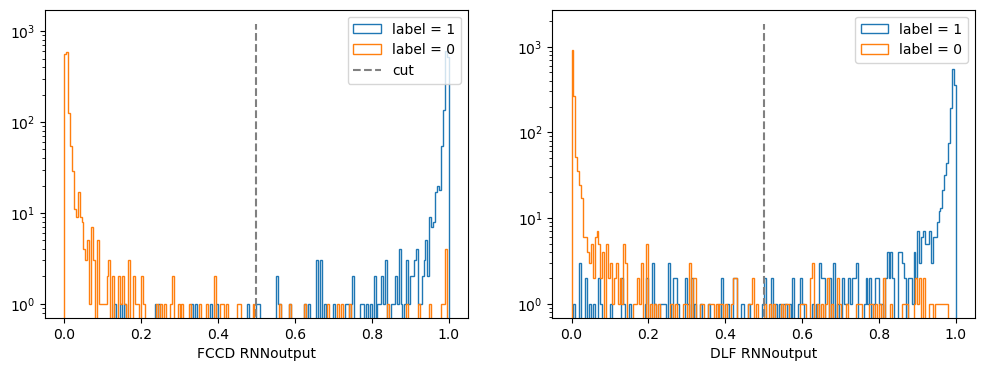


roc auc FCCD:  0.998512314850538
roc auc DLF:  0.9959386594465056

Total # misclassified trials FCCD:  27  / 3000
Total # misclassified trials DLF:  109  / 3000


<Figure size 640x480 with 0 Axes>

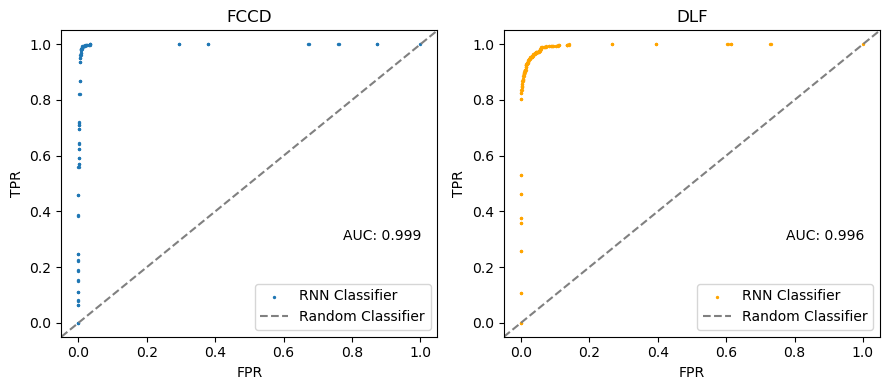

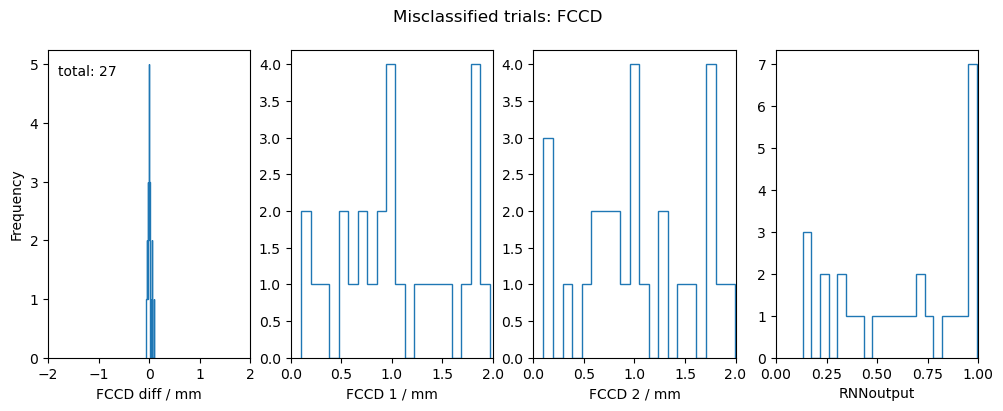

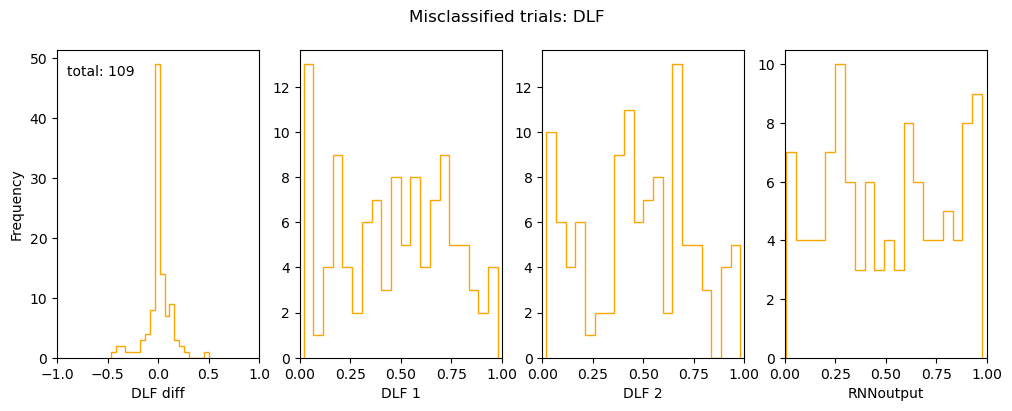

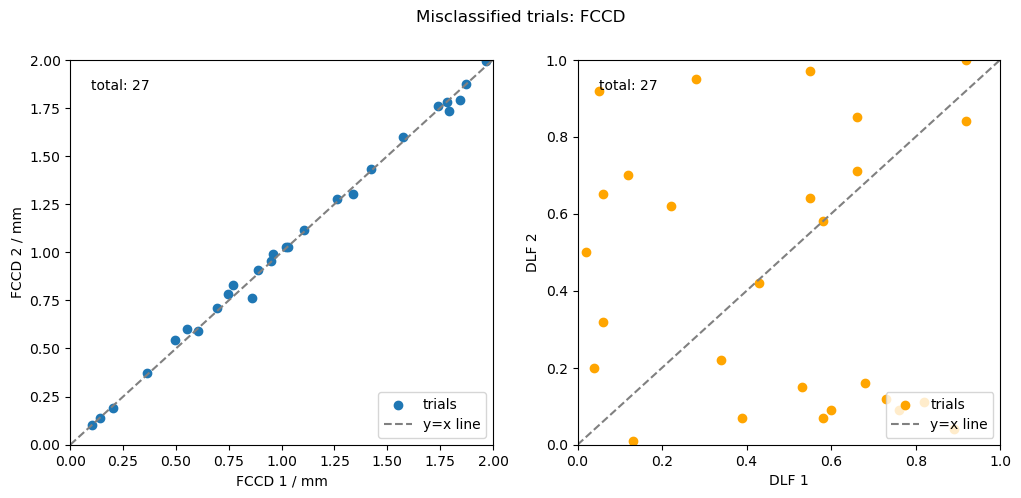

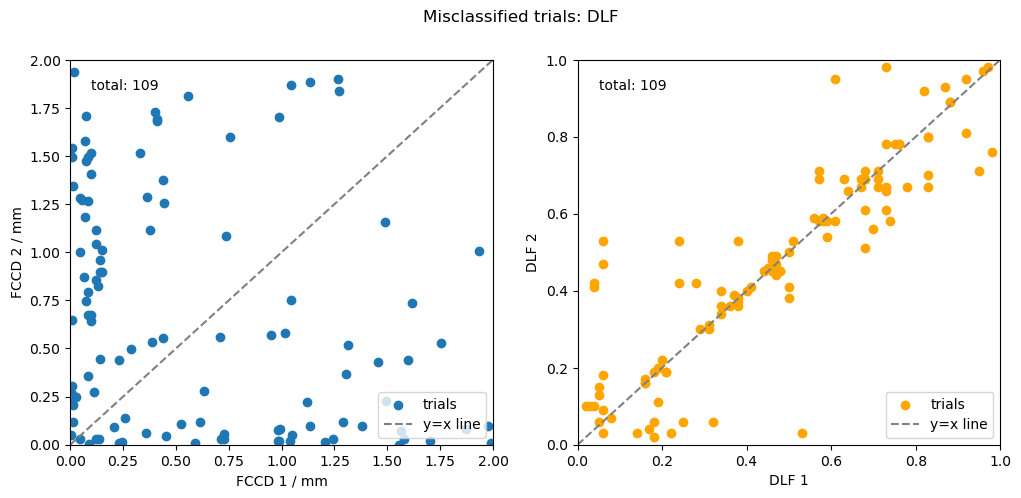

In [8]:
#testing
# accuracies_fulldataset = test_RNN(RNNclassifier_fulldataset, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)

accuracies_fulldataset = test_RNN(RNNclassifier_fulldataset, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)



In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, RNN_ID=RNN_ID, save_plots = True)


# TRAINING 1b: full dataset, cosine attention

In [9]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
RNN_ID = "RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_fulldataset_"+str(dataset_size)+"trials"
attention_mechanism="cosine"
RNN_ID = RNN_ID+"_"+attention_mechanism

## Testing

In [10]:
#load dataset again
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 209.93it/s]

(1000, 900)


In [11]:
# Load saved model
RNNclassifier_fulldataset = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_fulldataset.load_state_dict(torch.load(model_path))
RNNclassifier_fulldataset.eval()

RNN(
  (RNNLayer): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fcnet): FCNet(
    (fcnet): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
  )
  (attention_weight): Linear(in_features=512, out_features=512, bias=False)
)

Quantile regression loss function on DLF?:  False
FCCDonly?:  False
Selected decision thresholds: FCCD =  0.1 , DLF =  0.5


100%|████████████████████████████████████████████████████████████████████████████| 750/750 [01:07<00:00, 11.07it/s]


FCCD accuracies: 
total:  3000
TP:  1461
FP:  38
TN:  1476
FN:  25
accuracy:  0.979
precision:  0.9746497665110073
recall:  0.9831763122476447

DLF accuracies: 
total:  3000
TP:  1434
FP:  32
TN:  1466
FN:  68
accuracy:  0.9666666666666667
precision:  0.9781718963165075
recall:  0.9547270306258322


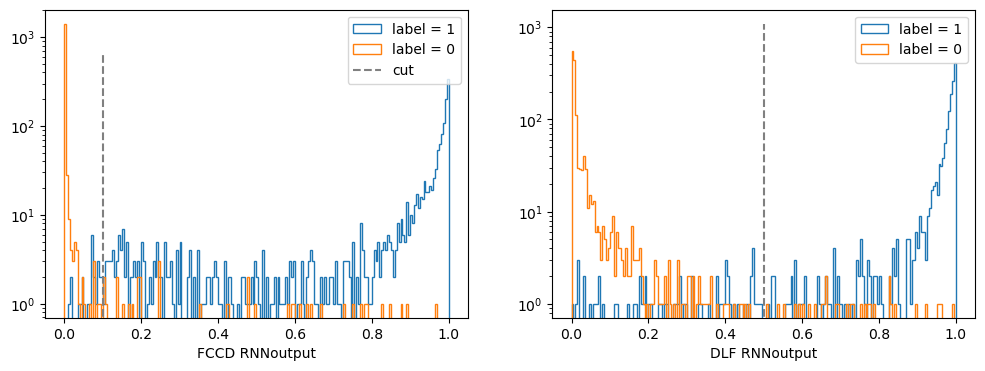


roc auc FCCD:  0.9968726164590338
roc auc DLF:  0.9954266585362818

Total # misclassified trials FCCD:  63  / 3000
Total # misclassified trials DLF:  100  / 3000


<Figure size 640x480 with 0 Axes>

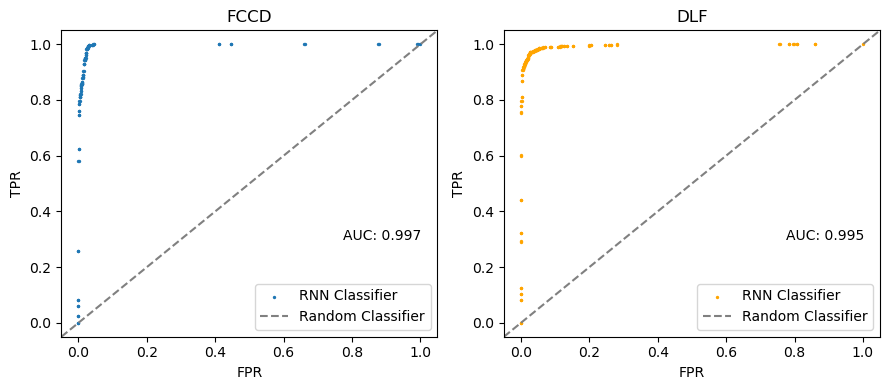

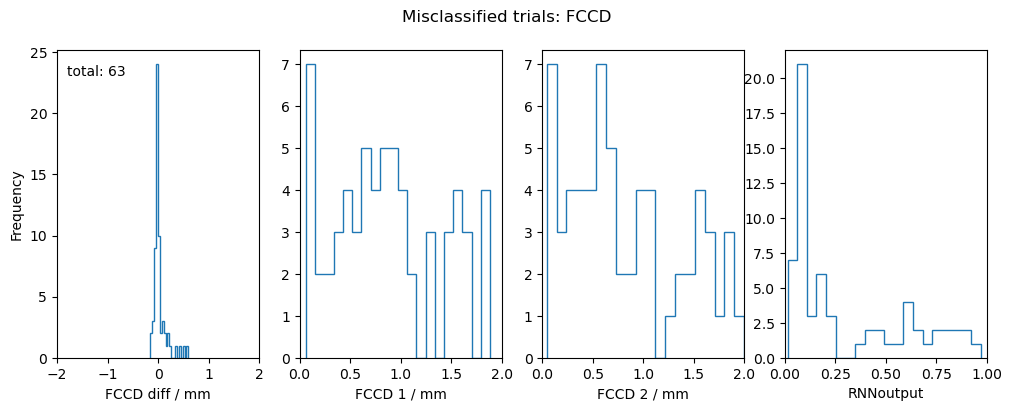

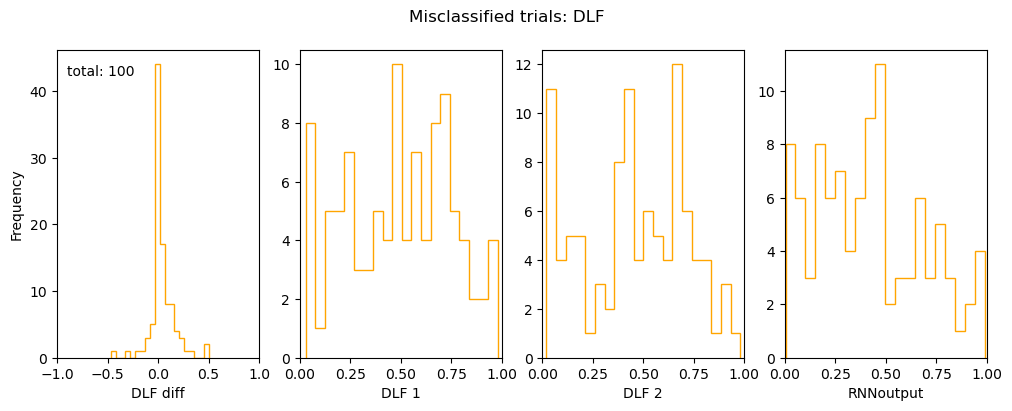

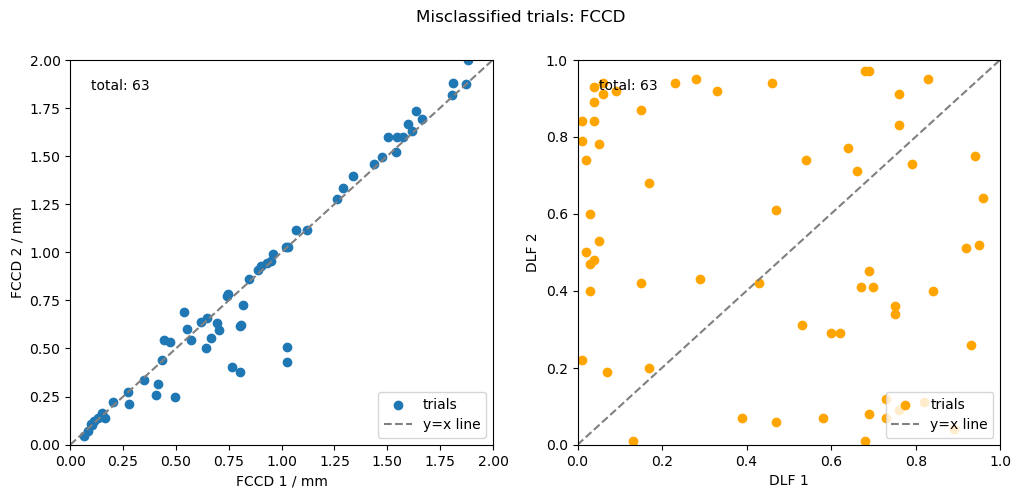

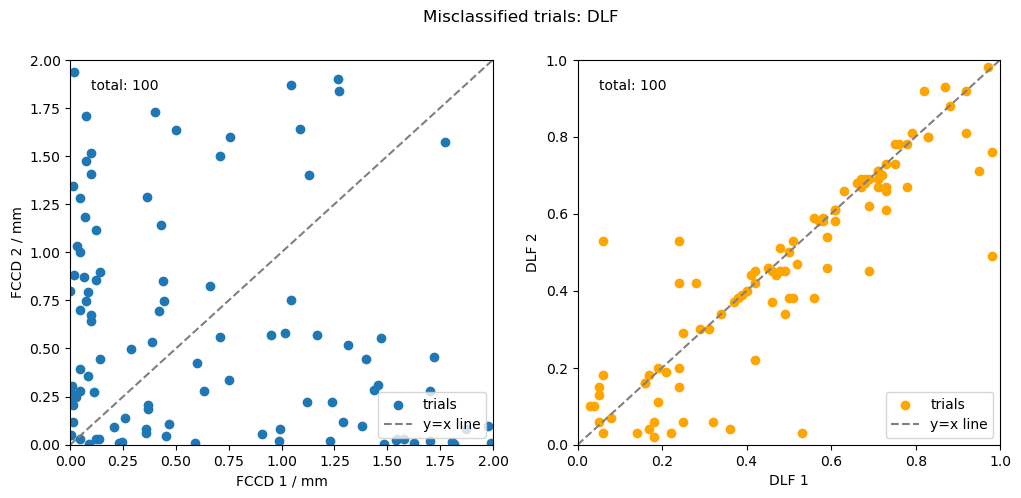

In [12]:
#testing
accuracies_fulldataset = test_RNN(RNNclassifier_fulldataset, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True, decision_thresholds=[0.1,0.5])


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True)


# TRAINING 2: restircted dataset - Max FCCD diff = 0.5 mm

Only train on FCCDs with a max diff of 0.5 mm

In [13]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000

maxFCCDdiff = 0.5
maxDLFdiff = 1.0 #i.e. no restriction
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on maxFCCDdiff=0.5mm

In [14]:
#Load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)


100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.26it/s]


(1000, 900)


In [15]:
# Load saved model
RNNclassifier_maxFCCDdiff0_5mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_5mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_5mm.eval()

RNN(
  (RNNLayer): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fcnet): FCNet(
    (fcnet): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
  )
  (attention_weight): Linear(in_features=512, out_features=512, bias=False)
)

Quantile regression loss function on DLF?:  False
FCCDonly?:  False
Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|████████████████████████████████████████████████████████████████████████████| 750/750 [01:08<00:00, 11.02it/s]


FCCD accuracies: 
total:  3000
TP:  1459
FP:  45
TN:  1478
FN:  18
accuracy:  0.979
precision:  0.9700797872340425
recall:  0.987813134732566

DLF accuracies: 
total:  3000
TP:  1439
FP:  91
TN:  1441
FN:  29
accuracy:  0.96
precision:  0.9405228758169935
recall:  0.9802452316076294


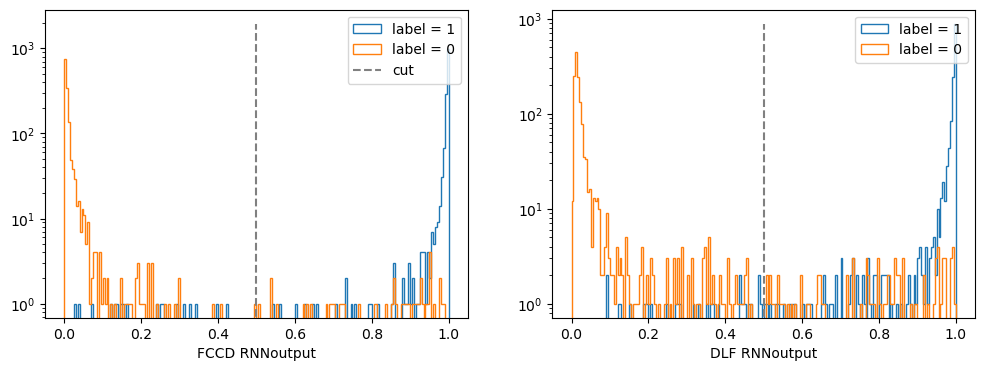


roc auc FCCD:  0.998849507284157
roc auc DLF:  0.99520226094009

Total # misclassified trials FCCD:  63  / 3000
Total # misclassified trials DLF:  120  / 3000


<Figure size 640x480 with 0 Axes>

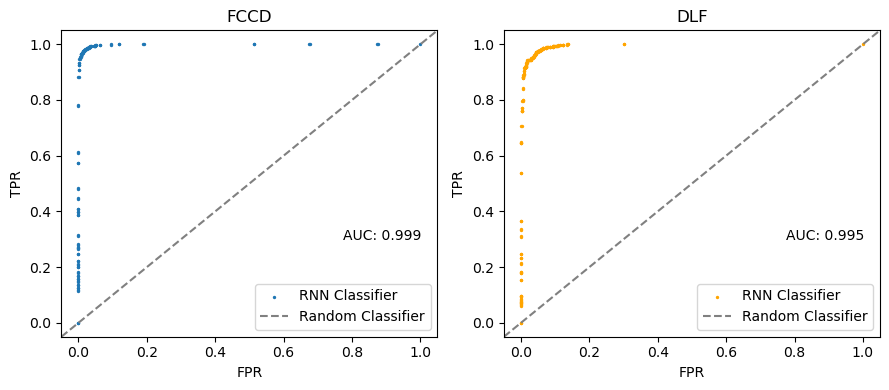

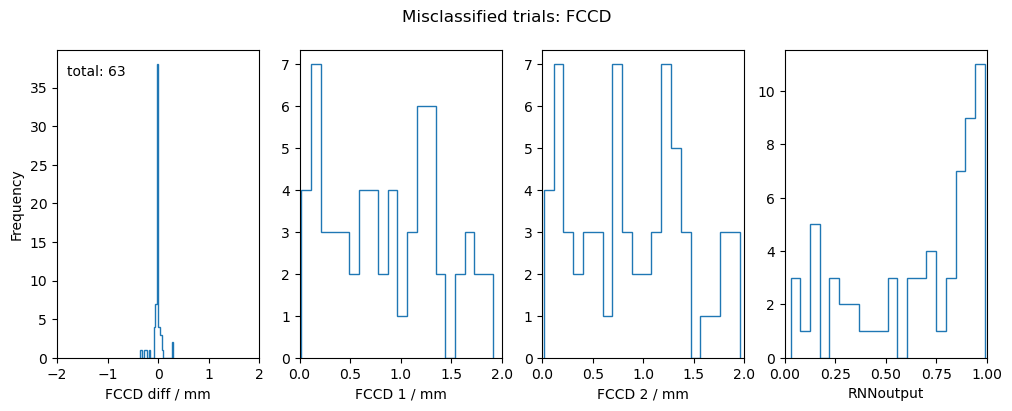

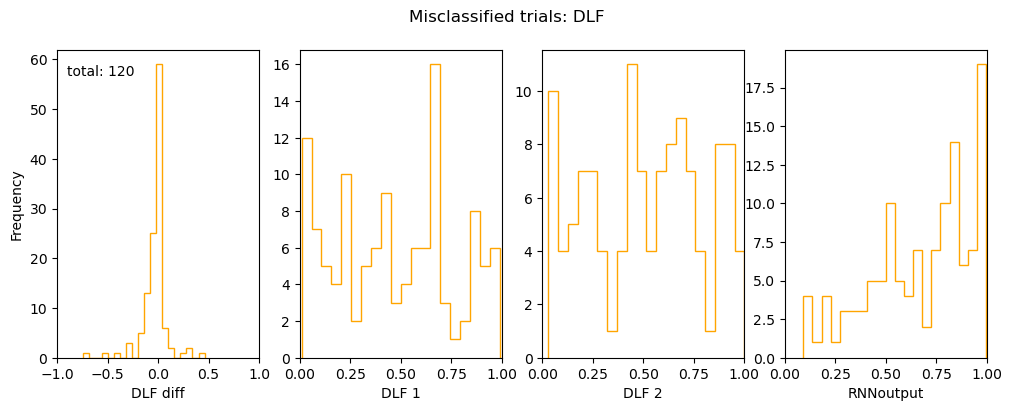

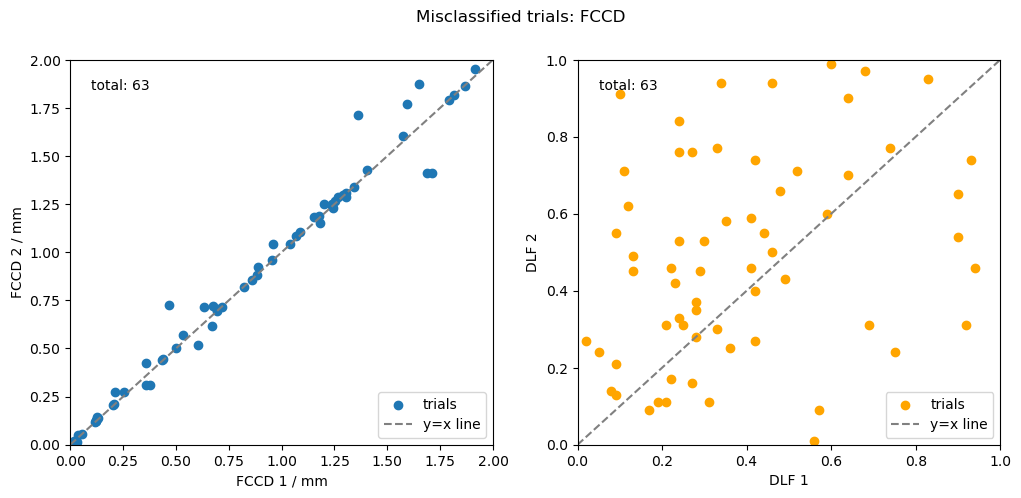

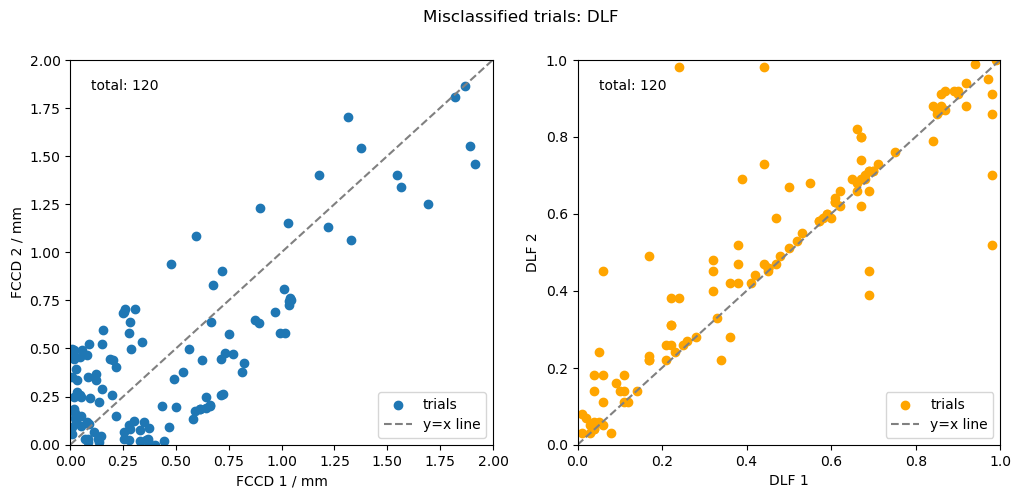

In [16]:
#testing
accuracies_maxFCCDdiff0_5mm = test_RNN(RNNclassifier_maxFCCDdiff0_5mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [17]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 213.97it/s]


(1000, 900)


Quantile regression loss function on DLF?:  False
FCCDonly?:  False
Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|████████████████████████████████████████████████████████████████████████████| 750/750 [01:09<00:00, 10.76it/s]


FCCD accuracies: 
total:  3000
TP:  1461
FP:  28
TN:  1486
FN:  25
accuracy:  0.9823333333333333
precision:  0.9811954331766286
recall:  0.9831763122476447

DLF accuracies: 
total:  3000
TP:  1414
FP:  155
TN:  1343
FN:  88
accuracy:  0.919
precision:  0.9012109623964308
recall:  0.9414114513981359


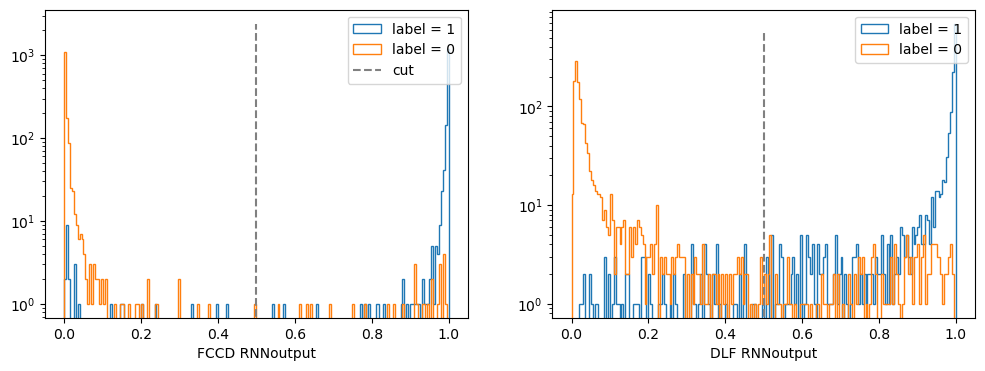


roc auc FCCD:  0.9974379990434722
roc auc DLF:  0.9784919617634876

Total # misclassified trials FCCD:  53  / 3000
Total # misclassified trials DLF:  243  / 3000


<Figure size 640x480 with 0 Axes>

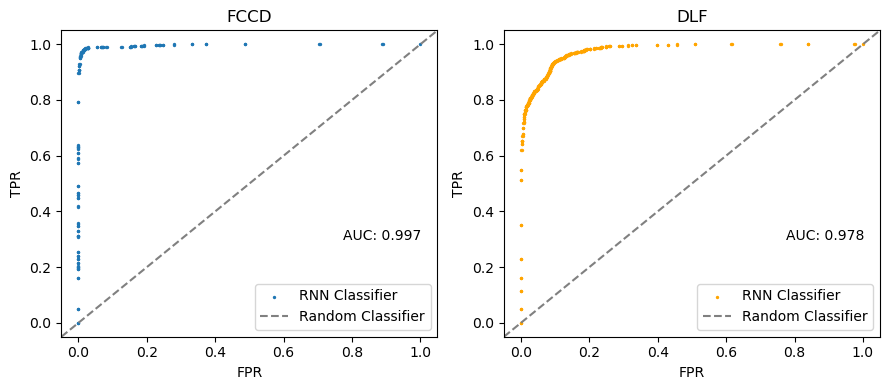

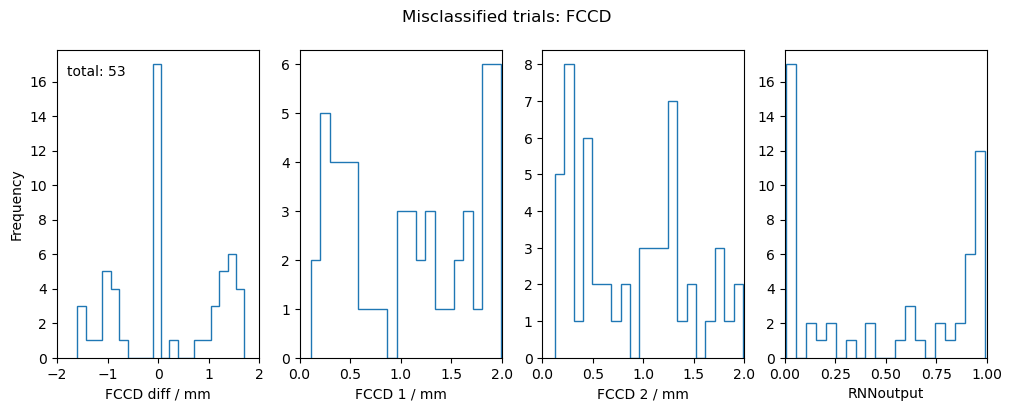

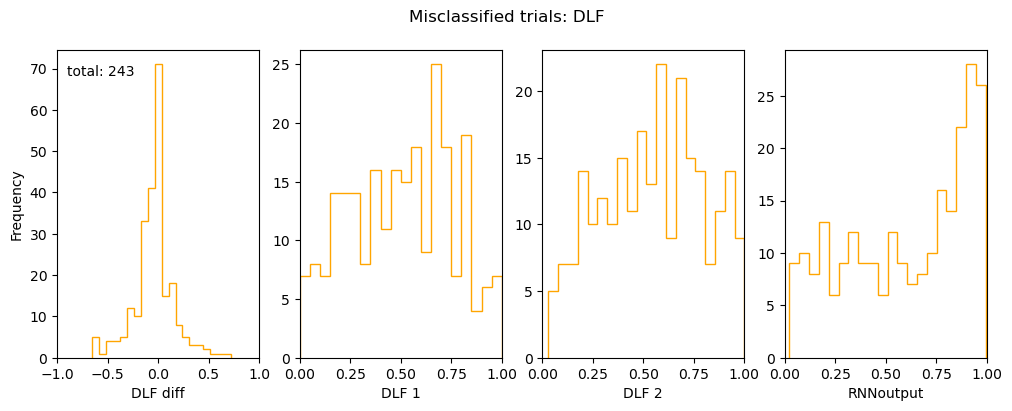

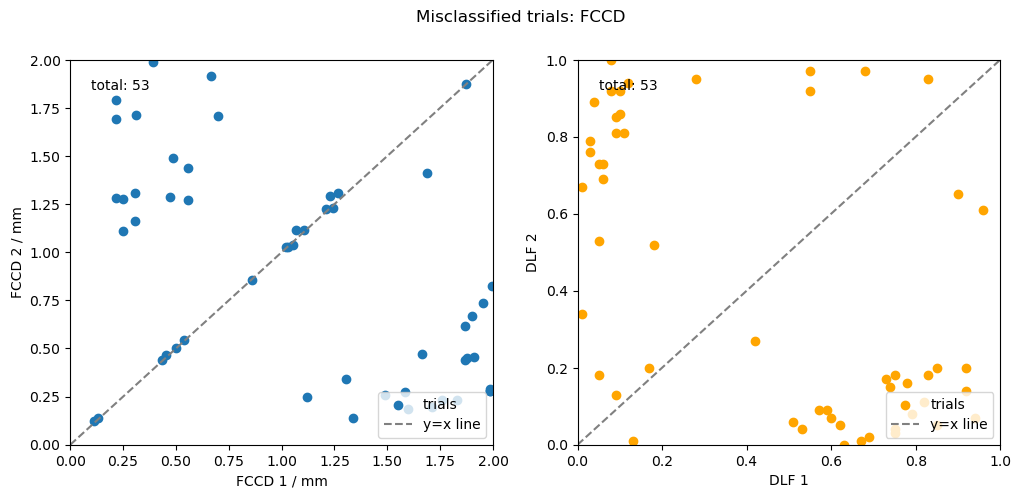

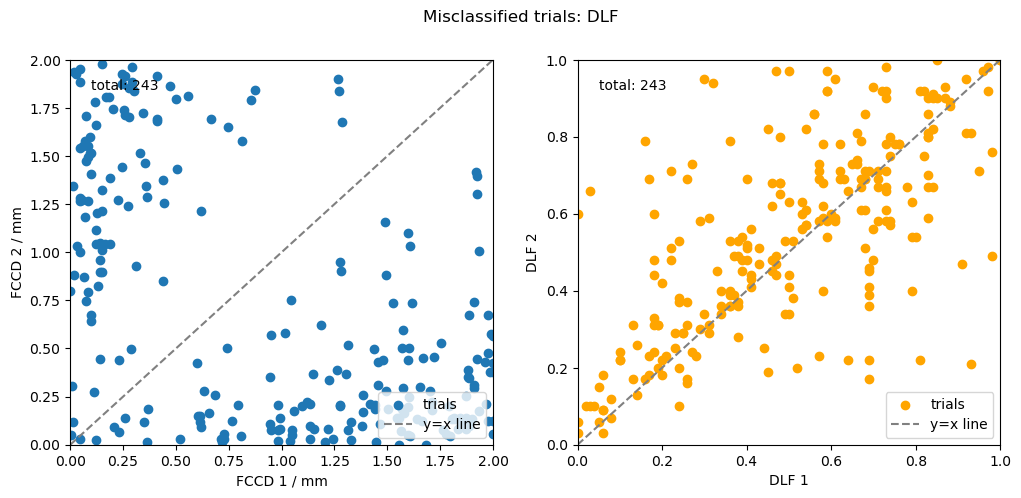

In [18]:
#testing
accuracies_maxFCCDdiff0_5mm = test_RNN(RNNclassifier_maxFCCDdiff0_5mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 3: restircted dataset - Max FCCD diff = 0.25 mm

Only train on FCCDs with a max diff of 0.25 mm

In [19]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000

maxFCCDdiff = 0.25
maxDLFdiff = 1.0 #i.e. no restriction
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on maxFCCDdiff=0.25mm

In [ ]:
#Load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)


In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_25mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_25mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_25mm.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_25mm = test_RNN(RNNclassifier_maxFCCDdiff0_25mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_25mm = test_RNN(RNNclassifier_maxFCCDdiff0_25mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 4: restircted dataset - Max FCCD diff = 0.25 mm AND Max DLF diff = 0.25

In [ ]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000

maxFCCDdiff = 0.25
maxDLFdiff = 0.25 
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_maxDLFdiff"+str(maxDLFdiff)+"_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on maxFCCDdiff=0.25mm and maxDLFdiff=0.25

In [ ]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)

In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_25mm_maxDLFdiff0_25 = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_25mm_maxDLFdiff0_25.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_25mm_maxDLFdiff0_25.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_25mm_maxDLFdiff0_25 = test_RNN(RNNclassifier_maxFCCDdiff0_25mm_maxDLFdiff0_25, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_25mm_maxDLFdiff0_25 = test_RNN(RNNclassifier_maxFCCDdiff0_25mm_maxDLFdiff0_25, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 5: restircted dataset - Max FCCD diff = 0.1 mm

In [ ]:
NUM_EPOCHS = 30 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000

maxFCCDdiff = 0.1
maxDLFdiff = 1.0 #i.e. no restriction
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")


## Testing - on maxFCCDdiff=0.1mm

In [ ]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)

In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_1mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_1mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_1mm.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_1mm = test_RNN(RNNclassifier_maxFCCDdiff0_1mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_1mm = test_RNN(RNNclassifier_maxFCCDdiff0_1mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 6a: restircted dataset - Max FCCD diff = 0.05 mm, normal attention

In [ ]:
NUM_EPOCHS = 40 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000

maxFCCDdiff = 0.05
maxDLFdiff = 1.0 #i.e. no restriction
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on maxFCCDdiff=0.05mm

In [ ]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)

In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_05mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_05mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_05mm.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_05mm = test_RNN(RNNclassifier_maxFCCDdiff0_05mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_05mm = test_RNN(RNNclassifier_maxFCCDdiff0_05mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 6b: restircted dataset - Max FCCD diff = 0.05 mm, cosine attention

In [ ]:
NUM_EPOCHS = 40 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
maxFCCDdiff = 0.05
maxDLFdiff = 1.0 #i.e. no restriction
attention_mechanism="normal"
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

attention_mechanism="cosine"
RNN_ID = RNN_ID+"_"+attention_mechanism

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on maxFCCDdiff=0.05mm

In [ ]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)

In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_05mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_05mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_05mm.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_05mm = test_RNN(RNNclassifier_maxFCCDdiff0_05mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve = True, decision_thresholds=[0.9,0.5])


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_05mm = test_RNN(RNNclassifier_maxFCCDdiff0_05mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve = True, decision_thresholds=[0.9,0.5])


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="cosine", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# TRAINING 7: restircted dataset - Max FCCD diff = 0.01 mm, normal attention

In [ ]:
NUM_EPOCHS = 80 #can try increasing
LEARNING_RATE = 0.01 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
maxFCCDdiff = 0.01
maxDLFdiff = 1.0 #i.e. no restriction
attention_mechanism="normal"
RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"


#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")
    

## Testing - on restricted dataset

In [ ]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size)

In [ ]:
# Load saved model
RNNclassifier_maxFCCDdiff0_01mm = RNN(dataset.get_histlen(),2)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_maxFCCDdiff0_01mm.load_state_dict(torch.load(model_path))
RNNclassifier_maxFCCDdiff0_01mm.eval()

In [ ]:
#testing
accuracies_maxFCCDdiff0_01mm = test_RNN(RNNclassifier_maxFCCDdiff0_01mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True)


## Testing - on full dataset

In [ ]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size)

In [ ]:
#testing
accuracies_maxFCCDdiff0_01mm = test_RNN(RNNclassifier_maxFCCDdiff0_01mm, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True)


In [ ]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)
    

In [ ]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True)


# ------------------------------------------
# Comparing RNNs
# ------------------------------------------

In [ ]:
from tabulate import tabulate


LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
maxFCCDdiff_list = ["NA", 0.5, 0.25, 0.1, 0.05, 0.01]
NUM_EPOCHS_list = [20,20,20,30,40, 80]

accuracy_FCCD_list, accuracy_DLF_list = [], []
roc_auc_FCCD_list, roc_auc_DLF_list = [], []

accuracy_FCCD_fulldataset_list, accuracy_DLF_fulldataset_list = [], []
roc_auc_FCCD_fulldataset_list, roc_auc_DLF_fulldataset_list = [], []


for ind, maxFCCDdiff in enumerate(maxFCCDdiff_list):
    if maxFCCDdiff == 0.01:
        LEARNING_RATE = 0.01
    NUM_EPOCHS = NUM_EPOCHS_list[ind]
    if maxFCCDdiff == "NA":
        RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_fulldataset_"+str(dataset_size)+"trials"
    else:
        RNN_ID ="RNN_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"
    
    accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies.json"
    with open(accuracies_path) as json_file:
        data=json.load(json_file)
    accuracy_FCCD_list.append(round(data["accuracy_FCCD"],3))
    accuracy_DLF_list.append(round(data["accuracy_DLF"],3))
    roc_auc_FCCD_list.append(round(data["roc_auc_FCCD"],3))
    roc_auc_DLF_list.append(round(data["roc_auc_DLF"],3))
    
    if maxFCCDdiff == "NA":
        accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies.json"
    else:
        accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies_fulldataset.json"
    with open(accuracies_path) as json_file:
        data=json.load(json_file)
    accuracy_FCCD_fulldataset_list.append(round(data["accuracy_FCCD"],3))
    accuracy_DLF_fulldataset_list.append(round(data["accuracy_DLF"],3))
    roc_auc_FCCD_fulldataset_list.append(round(data["roc_auc_FCCD"],3))
    roc_auc_DLF_fulldataset_list.append(round(data["roc_auc_DLF"],3))  


headers = [r"Max($\Delta_{FCCD}$) /mm", r"Accuracy FCCD", r"Accuracy DLF",  r"roc auc FCCD", r"roc auc DLF"]
    
print("Evaluated on restricted test dataset")
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_list, accuracy_DLF_list ,roc_auc_FCCD_list, roc_auc_DLF_list)), headers=headers,tablefmt="double_outline"))   
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_list, accuracy_DLF_list ,roc_auc_FCCD_list, roc_auc_DLF_list)), headers=headers,tablefmt="latex_raw"))
    
print("")
print("Evaluated on full dataset")
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_fulldataset_list, accuracy_DLF_fulldataset_list ,roc_auc_FCCD_fulldataset_list, roc_auc_DLF_fulldataset_list)), headers=headers,tablefmt="double_outline"))   
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_fulldataset_list, accuracy_DLF_fulldataset_list ,roc_auc_FCCD_fulldataset_list, roc_auc_DLF_fulldataset_list)), headers=headers,tablefmt="latex_raw"))
    
    
#use: https://quicklatex.com/ to view latex table
    
    
    
    

### -----------------------------------------------------------
# Questions to ask:

- **Why warm up attention mechanism?:**

*Answer: This is a special treatment for attention mechanism. The idea of warmup is to use very low learning rate at the beginning and then gradually increase the learning rate to nominal value. If we do this, the attention mechanism will be able to get a first sense of how the data looks like with those very low learning rate epochs. There are some papers you can read, but I think they are too technical and I don’t want you to get too deep into those technical details.*


- **Why does binary cross entropy loss value oscillate between epochs?**

*Answer: the main reason of oscillation is because of the stochastic training behavior. Stochastic Gradient Descent (SGD) is the base template of all ML optimizers. The idea of SGD is to randomly draw mini-batches from the entire dataset and train. Since the drawing is random, everytime it will introduce some stochasticity into the training, that’s the main reason your loss is oscillating. To me it looks very normal.*



- **Saving trained model -> how do you also save the train/test split/seed so that we dont test on data that was used for training?**

*Answer: I think for your case you don’t quite need to worry about overlapping between training/testing dataset just yet, because each of your data is a residual of subtraction of two spectrums. The probability that you have subtracted exactly two identical spectrums is low.*


- **Should there be an attention score for DLF and FCCD?**

*Answer: There is only one set of attention score, because the RNN is making a joint decisions to determine DLF and FCCD simultaneously. So ideally the attention score would show the part that both indicates FCCD and DLF differences.*


- **Attention plots: should I plot spectrum 1 and 2 for each sample? Should I average over multiple spectra so we can observe the overall trends?**



- **Restricted training: on both FCCD and DLF? Take in turns?**



- **After training on restricted dataset (e.g. maxFCCDdiff=0.5mm), should the testing/accuracy evaluation be performed on the test_loader of this restricted dataset, or the test_loader of the full dataset? Note that the performance on the whole dataset when trained on a restircted dataset is generally worse**


- **Restricted training: When maxFCCDdiff is restricted to 0.25mm, the RNN performs worse. Should I edit training parameters (i.e. increase no epochs, LR, etc) in order to try to improve the performance?**



Notes:
- make 2 attention plots, 1 like the one i already have, and one power spectrum/stacked histogram of all the attention scores in one -> just plot multiple attention on same graph
- just restrict FCCD (not DLF) and make as small as possible - i.e. to the resolution of traditional method
- to increase statistics, repetitively call testloader
- try training with 10,000 events instead
- try other attention mechanisam - compare graphs and see which makes more physical sense


to do 12/1/2023:
- repeat process of decreasing maxFCCDdiff until accuracy drops below 60%
- cosine mechanism needs retraining
- change attention plot



to do 19/1/2023:
- comput ROC for each NN (because cosine mechanism has a different decision boundary)
- keep reducing fccddiff until accuracy becomes 0.5




In [ ]:

#     binwidth = 0.5 #keV
#     bins = np.arange(0,450+binwidth,binwidth)
#     bins_centres = np.delete(bins+binwidth/2,-1)


#     # data values
#     data_spectrum = torch.tensor(dataset.get_data()).to(DEVICE).float()
#     data_outputs = RNNclassifier(data_spectrum)
#     data_outputs = data_outputs.cpu().data.numpy()#.flatten()
#     data_out_index = np.argmax(data_outputs)